use py 3.10.7

In [1]:
import pandas as pd
import numpy as np
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [2]:
#corr_df = pd.read_csv("..\\data\\correlation_sparse.csv")
df = pd.read_csv("..\\data\\processed_balance_sheet.csv")

In [3]:
df.head(7)

,Unnamed: 0,years,Equity Share Capital,Total Share Capital,Reserves and Surplus,Total Reserves and Surplus,Total Shareholders Funds,Long Term Borrowings,Deferred Tax Liabilities [Net],Other Long Term Liabilities,...,Capital Goods,Expenditure In Foreign Currency,Dividend Remittance In Foreign Currency,FOB Value Of Goods,Other Earnings,Bonus Equity Share Capital,Non-Current Investments Quoted Market Value,Non-Current Investments Unquoted Book Value,Current Investments Quoted Market Value,Current Investments Unquoted Book Value
0,0,3/1/2022,422.47,537.82,25993.26,25993.26,26531.08,40511.30,0.0,642.80,...,0.0,1554.82,0.0,0,93.88,176.79,0.0,36371.70,0,0.00
1,1,3/1/2021,406.35,512.18,21228.40,21228.40,21740.58,30844.29,0.0,723.74,...,0.0,1198.29,0.0,0,40.49,176.79,0.0,20768.88,0,926.02
2,2,3/1/2020,406.35,503.44,19292.29,19292.29,19795.73,24540.66,0.0,761.92,...,0.0,902.08,0.0,0,41.40,176.79,0.0,15603.89,0,11.89
3,3,3/1/2019,414.19,514.13,19911.60,19911.60,20425.73,17982.19,0.0,718.32,...,0.0,620.57,0.0,0,0.00,180.21,0.0,13455.48,0,501.11
4,4,3/1/2018,414.19,505.88,17703.19,17703.19,18209.07,18748.10,0.0,842.51,...,0.0,541.64,0.0,0,0.00,180.21,0.0,10023.13,0,519.20
5,5,3/1/2017,414.19,498.31,16284.78,16284.78,16783.09,16076.45,0.0,757.36,...,0.0,378.92,0.0,0,0.00,180.21,0.0,9515.65,0,894.74
6,6,3/1/2016,414.19,414.19,13151.62,13151.62,13565.81,10247.05,0.0,827.86,...,0.0,363.83,0.0,0,0.00,180.21,0.0,5184.77,0,128.10


In [4]:
df = df[df.columns[1:]]
df.head(5)

,years,Equity Share Capital,Total Share Capital,Reserves and Surplus,Total Reserves and Surplus,Total Shareholders Funds,Long Term Borrowings,Deferred Tax Liabilities [Net],Other Long Term Liabilities,Long Term Provisions,...,Capital Goods,Expenditure In Foreign Currency,Dividend Remittance In Foreign Currency,FOB Value Of Goods,Other Earnings,Bonus Equity Share Capital,Non-Current Investments Quoted Market Value,Non-Current Investments Unquoted Book Value,Current Investments Quoted Market Value,Current Investments Unquoted Book Value
0,3/1/2022,422.47,537.82,25993.26,25993.26,26531.08,40511.30,0.0,642.80,5.47,...,0.0,1554.82,0.0,0,93.88,176.79,0.0,36371.70,0,0.00
1,3/1/2021,406.35,512.18,21228.40,21228.40,21740.58,30844.29,0.0,723.74,2.40,...,0.0,1198.29,0.0,0,40.49,176.79,0.0,20768.88,0,926.02
2,3/1/2020,406.35,503.44,19292.29,19292.29,19795.73,24540.66,0.0,761.92,0.00,...,0.0,902.08,0.0,0,41.40,176.79,0.0,15603.89,0,11.89
3,3/1/2019,414.19,514.13,19911.60,19911.60,20425.73,17982.19,0.0,718.32,0.00,...,0.0,620.57,0.0,0,0.00,180.21,0.0,13455.48,0,501.11
4,3/1/2018,414.19,505.88,17703.19,17703.19,18209.07,18748.10,0.0,842.51,0.00,...,0.0,541.64,0.0,0,0.00,180.21,0.0,10023.13,0,519.20


In [5]:
df['years'] = pd.to_datetime(df['years'],infer_datetime_format=True)
df = df.set_index(['years'])
df.head(5)

,Equity Share Capital,Total Share Capital,Reserves and Surplus,Total Reserves and Surplus,Total Shareholders Funds,Long Term Borrowings,Deferred Tax Liabilities [Net],Other Long Term Liabilities,Long Term Provisions,Total Non-Current Liabilities,...,Capital Goods,Expenditure In Foreign Currency,Dividend Remittance In Foreign Currency,FOB Value Of Goods,Other Earnings,Bonus Equity Share Capital,Non-Current Investments Quoted Market Value,Non-Current Investments Unquoted Book Value,Current Investments Quoted Market Value,Current Investments Unquoted Book Value
years,,,,,,,,,,,,,,,,,,,,,
2022-03-01,422.47,537.82,25993.26,25993.26,26531.08,40511.30,0.0,642.80,5.47,41159.57,...,0.0,1554.82,0.0,0,93.88,176.79,0.0,36371.70,0,0.00
2021-03-01,406.35,512.18,21228.40,21228.40,21740.58,30844.29,0.0,723.74,2.40,31570.43,...,0.0,1198.29,0.0,0,40.49,176.79,0.0,20768.88,0,926.02
2020-03-01,406.35,503.44,19292.29,19292.29,19795.73,24540.66,0.0,761.92,0.00,25302.58,...,0.0,902.08,0.0,0,41.40,176.79,0.0,15603.89,0,11.89
2019-03-01,414.19,514.13,19911.60,19911.60,20425.73,17982.19,0.0,718.32,0.00,18700.51,...,0.0,620.57,0.0,0,0.00,180.21,0.0,13455.48,0,501.11
2018-03-01,414.19,505.88,17703.19,17703.19,18209.07,18748.10,0.0,842.51,0.00,19590.61,...,0.0,541.64,0.0,0,0.00,180.21,0.0,10023.13,0,519.20


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,6


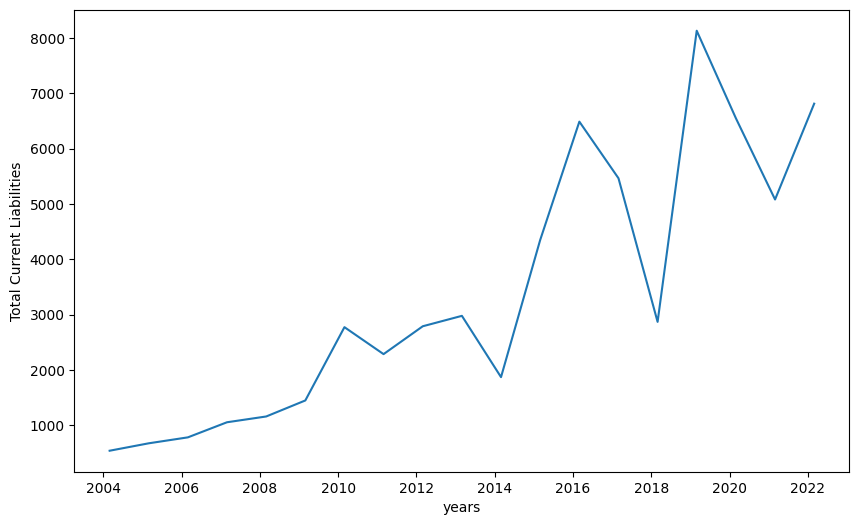

In [7]:
plt.xlabel("years")
plt.ylabel("Total Current Liabilities")
plt.plot(df['Total Current Liabilities'])

Rolling Statistics

In [8]:
rolling_mean = df["Total Current Liabilities"].rolling(window=3).mean()
rolling_std = df["Total Current Liabilities"].rolling(window=3).std()
#print(rolling_mean,rolling_std)


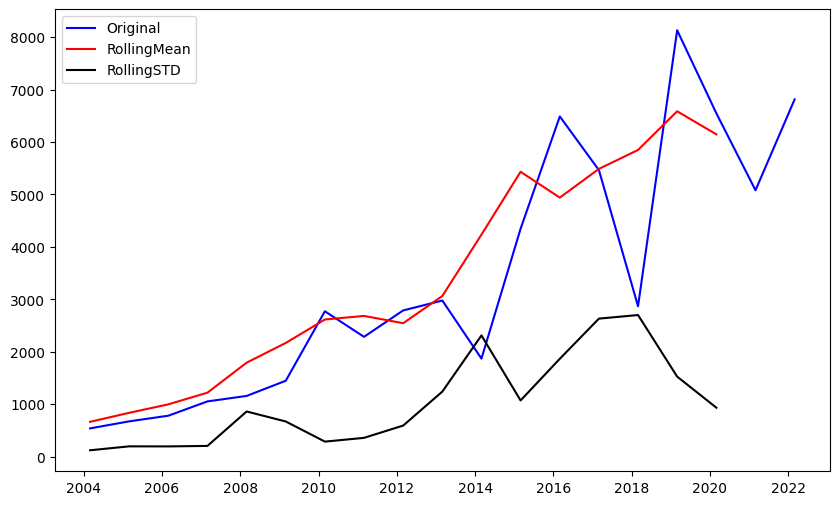

In [9]:
#plotting rolling stats
original  =  plt.plot(df['Total Current Liabilities'], color = 'blue', label = 'Original')
rollMean  =  plt.plot(rolling_mean, color = 'red', label = 'RollingMean')
rollstd  =  plt.plot(rolling_std, color = 'black', label = 'RollingSTD')
plt.legend(loc = "best")
plt.show(block=False)


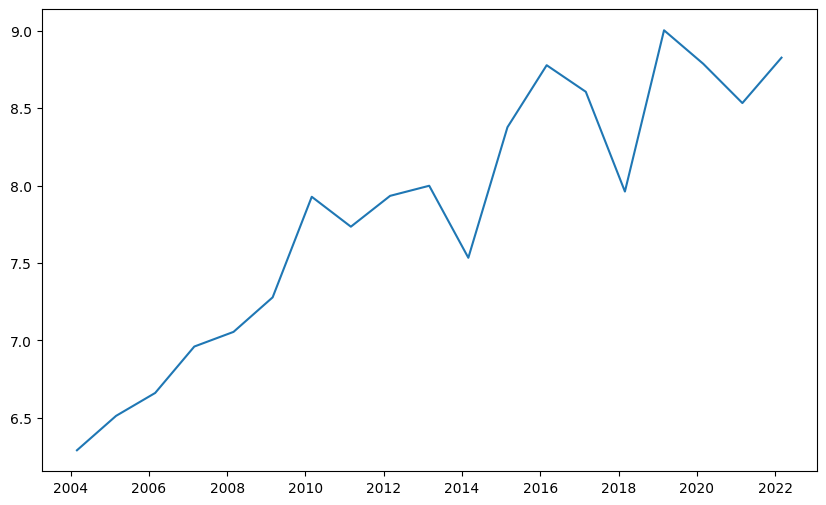

In [10]:
df_logscale_TCL = np.log(df['Total Current Liabilities'])
plt.plot(df_logscale_TCL)

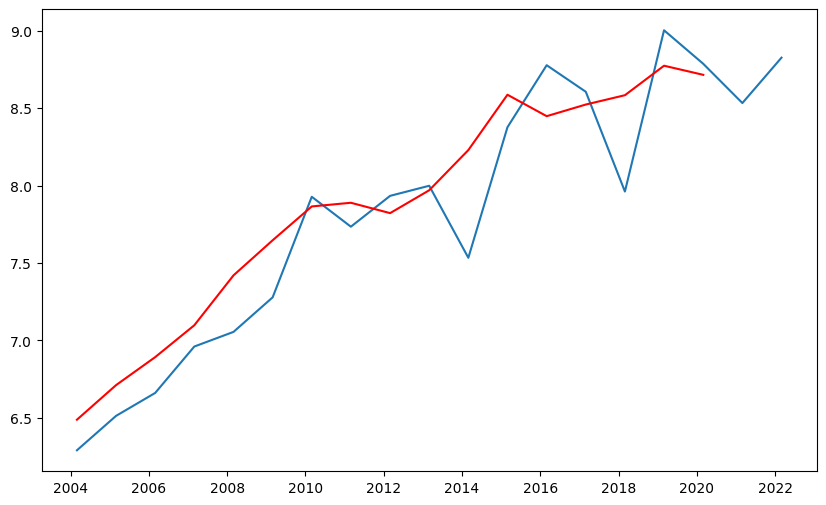

In [11]:
#Calculating Moving Average
MovingAverage = df_logscale_TCL.rolling(window=3).mean()
MovingSTD = df_logscale_TCL.rolling(window=3).std()
plt.plot(df_logscale_TCL)
plt.plot(MovingAverage,color = "red")


In [12]:
df_logscaleMinusMovingAverage = df_logscale_TCL - MovingAverage
df_logscaleMinusMovingAverage.dropna(inplace=True)
df_logscaleMinusMovingAverage = pd.DataFrame(df_logscaleMinusMovingAverage)
df_logscaleMinusMovingAverage.columns = ['Total Current Liabilities']


In [13]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):

    #determinig rolling stats
    MovingAverage = timeseries.rolling(window = 3).mean()
    MovingSTD = timeseries.rolling(window = 3).std()

    #plotting rolling stats
    original = plt.plot(timeseries, color="blue", label = 'Original')
    mean = plt.plot(MovingAverage, color="red", label = 'Rolling Mean')
    std = plt.plot(MovingSTD, color="black", label = 'Rolling std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block = False)

    #Dickey - Fuller Test:
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries[timeseries.columns[0]], autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

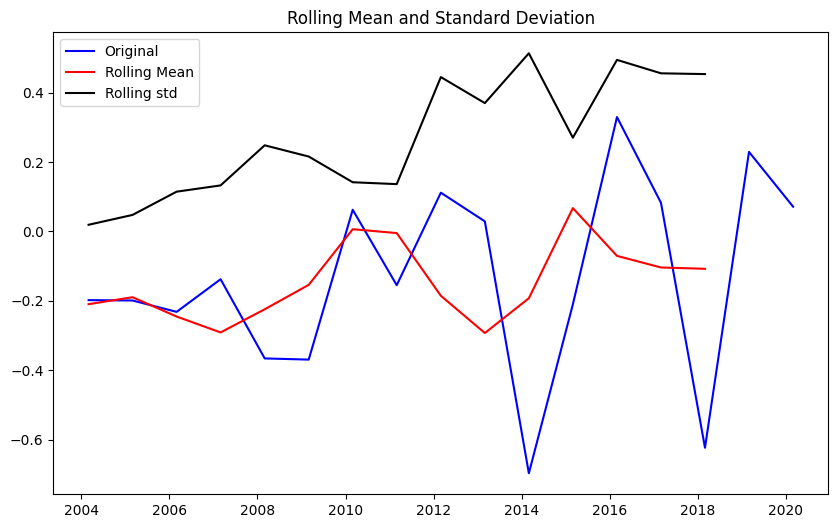

Results of Dickey-Fuller Test:
Test Statistic                 -4.262275
p-value                         0.000516
#Lags Used                      0.000000
Number of Observations Used    16.000000
Critical Value (1%)            -3.924019
Critical Value (5%)            -3.068498
Critical Value (10%)           -2.673893
dtype: float64


In [14]:
test_stationary(df_logscaleMinusMovingAverage)

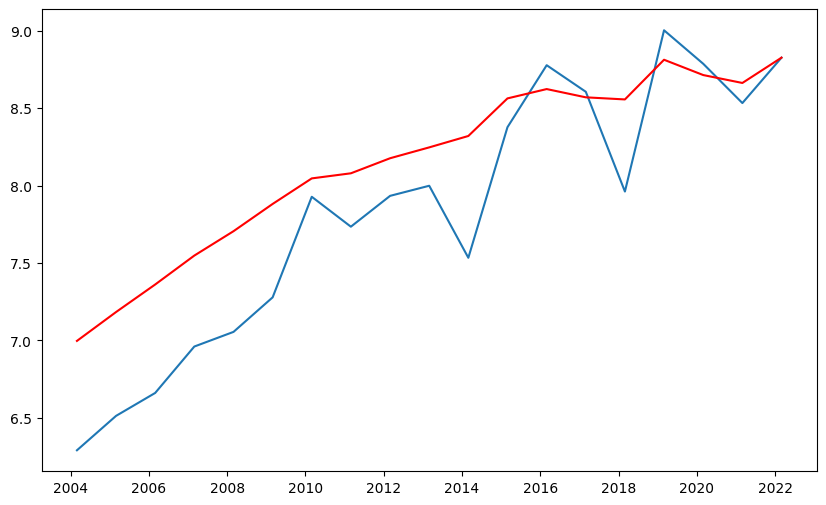

In [15]:
df_exponentialDecayWeightedAverage = df_logscale_TCL.ewm(halflife= 3, min_periods= 0 , adjust= True).mean()
plt.plot(df_logscale_TCL)
plt.plot(df_exponentialDecayWeightedAverage,color = 'red')

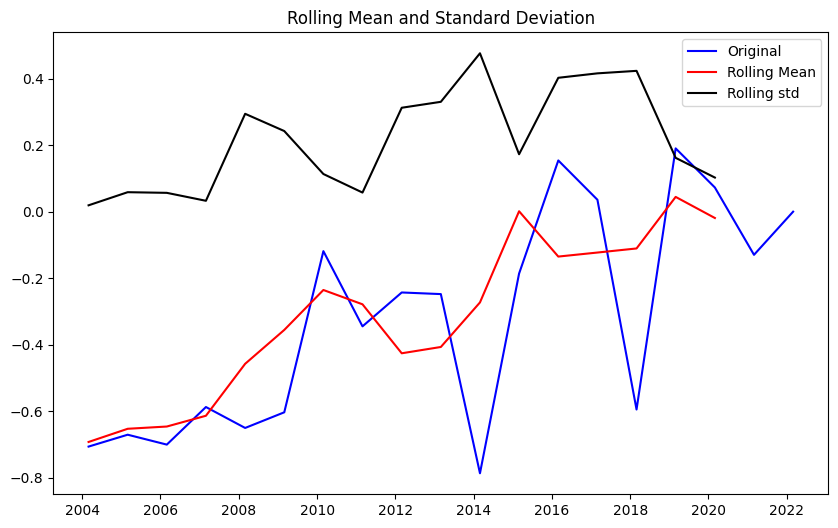

Results of Dickey-Fuller Test:
Test Statistic                 -2.545891
p-value                         0.104704
#Lags Used                      0.000000
Number of Observations Used    18.000000
Critical Value (1%)            -3.859073
Critical Value (5%)            -3.042046
Critical Value (10%)           -2.660906
dtype: float64


In [16]:
df_logscale_TCL_minus_df_exponential_decay_weighted_average = df_logscale_TCL - df_exponentialDecayWeightedAverage
df_logscale_TCL_minus_df_exponential_decay_weighted_average = pd.DataFrame(df_logscale_TCL_minus_df_exponential_decay_weighted_average)
df_logscale_TCL_minus_df_exponential_decay_weighted_average.columns = ['Total Current Liabilities']
test_stationary(df_logscale_TCL_minus_df_exponential_decay_weighted_average)

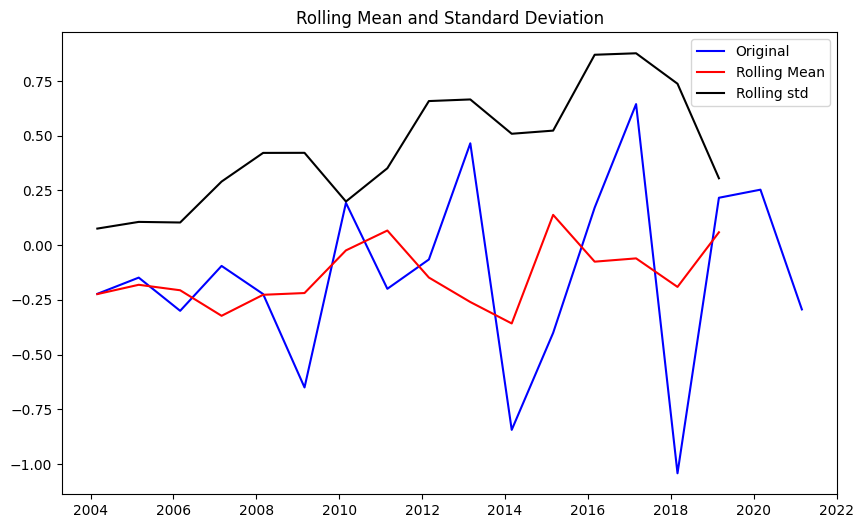

Results of Dickey-Fuller Test:
Test Statistic                 -5.435479
p-value                         0.000003
#Lags Used                      1.000000
Number of Observations Used    16.000000
Critical Value (1%)            -3.924019
Critical Value (5%)            -3.068498
Critical Value (10%)           -2.673893
dtype: float64


In [17]:
df_logscale_TCL_shifted = df_logscale_TCL - df_logscale_TCL.shift()
df_logscale_TCL_shifted.dropna(inplace=True)
df_logscale_TCL_shifted = pd.DataFrame(df_logscale_TCL_shifted)
df_logscale_TCL_shifted.columns = ['Total Current Liabilities']
test_stationary(df_logscale_TCL_shifted)

create and evaluate an updated autoregressive model

[6813.4  5080.79 6547.8  8132.3  2868.05 5464.95 6488.49 4346.06 1869.11
 2977.21 2789.05 2285.1  2772.58 1447.37 1157.82 1053.17  780.28  672.83
  538.67]
predicted=210.793411, expected=6813.400000
predicted=2307.355619, expected=5080.790000
predicted=1093.604886, expected=6547.800000
predicted=5711.345290, expected=8132.300000
predicted=5034.761665, expected=2868.050000
predicted=4020.896192, expected=5464.950000
predicted=6362.034019, expected=6488.490000
predicted=3164.081335, expected=4346.060000
predicted=3983.491395, expected=1869.110000
predicted=3963.108348, expected=2977.210000
predicted=3199.883057, expected=2789.050000
predicted=1475.049564, expected=2285.100000
predicted=2018.678519, expected=2772.580000
predicted=2109.918388, expected=1447.370000
predicted=1295.086836, expected=1157.820000
predicted=1616.779454, expected=1053.170000
predicted=767.752998, expected=780.280000
predicted=499.979293, expected=672.830000
predicted=420.193647, expected=538.670000
Test RMSE: 2325

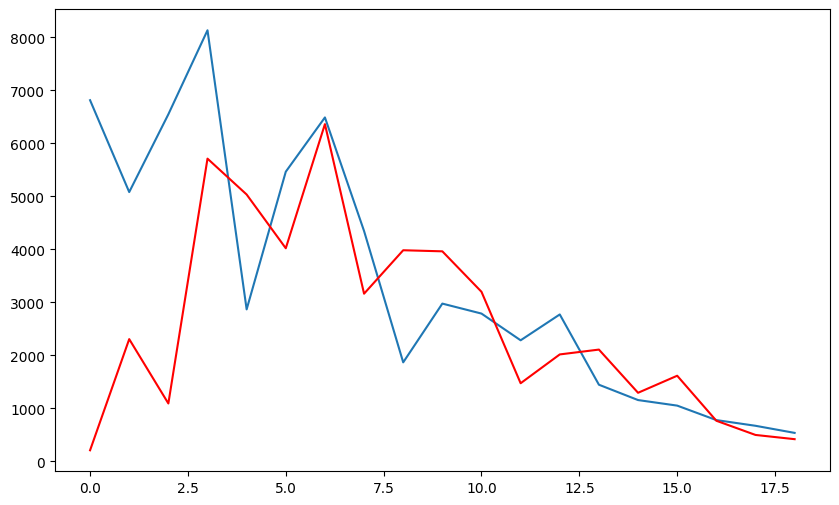

In [18]:
# didnt find effective
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('..\\data\\processed_balance_sheet.csv', header=0, index_col=0, parse_dates=True)
series = series['Total Current Liabilities']
# split dataset
X = series.values
print(X)
train, test = X, X
# train autoregression
window = 3
model = AutoReg(train, lags=3)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [19]:
df_TCL = df['Total Current Liabilities']
df_TCL = pd.DataFrame(df_TCL)
df_TCL.columns = ['Total Current Liabilities']
df_TCL


,Total Current Liabilities
years,
2022-03-01,6813.40
2021-03-01,5080.79
2020-03-01,6547.80
2019-03-01,8132.30
2018-03-01,2868.05
2017-03-01,5464.95
2016-03-01,6488.49
2015-03-01,4346.06
2014-03-01,1869.11


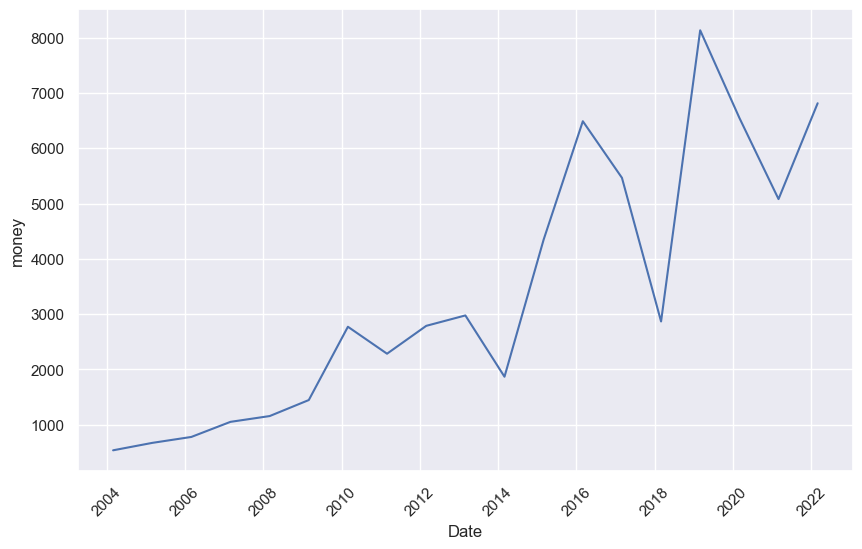

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.ylabel('money')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(df_TCL.index, df_TCL['Total Current Liabilities'], )

Best Prediction so-far --->

c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1AS-MAR will be used.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1AS-MAR will be used.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All 

[datetime.datetime(2022, 2, 1, 0, 0), datetime.datetime(2023, 2, 1, 0, 0), datetime.datetime(2024, 2, 1, 0, 0), datetime.datetime(2025, 2, 1, 0, 0), datetime.datetime(2026, 2, 1, 0, 0), datetime.datetime(2027, 2, 1, 0, 0), datetime.datetime(2028, 2, 1, 0, 0), datetime.datetime(2029, 2, 1, 0, 0), datetime.datetime(2030, 2, 1, 0, 0), datetime.datetime(2031, 2, 1, 0, 0), datetime.datetime(2032, 2, 1, 0, 0)]


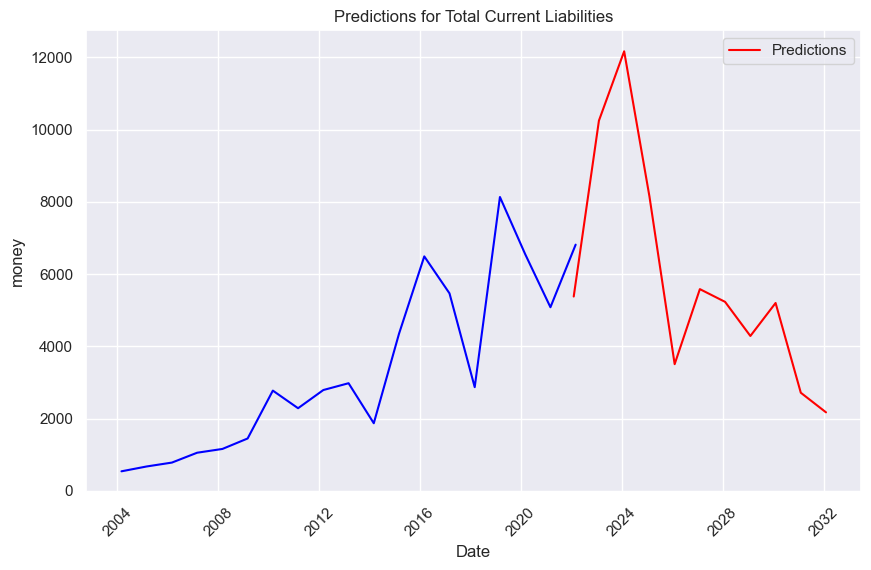

In [21]:
from datetime import datetime
from dateutil.rrule import rrule, YEARLY
from statsmodels.tsa.statespace.sarimax import SARIMAX

y = df_TCL['Total Current Liabilities']
SARIMAXmodel = SARIMAX(y, order = (2, 0, 1), seasonal_order=(5,8,10,15))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(11)
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])

predicted_dates = list(rrule(YEARLY, dtstart=datetime(2022, 2, 1), until=datetime(2032,2,1)))
print(predicted_dates)

y_pred_df.index = predicted_dates
y_pred_out = y_pred_df["Predictions"] 

sns.set()
plt.title("Predictions for Total Current Liabilities")
plt.ylabel('money')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(df_TCL, color = "blue")
plt.plot(y_pred_out, color='red', label = 'Predictions')
plt.legend()
plt.show()

In [22]:
df_TCA = df["Total Current Assets"]
df_TCA = pd.DataFrame(df_TCA)
df_TCA.columns = ["Total Current Assets"]


c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1AS-MAR will be used.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1AS-MAR will be used.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All 

[datetime.datetime(2022, 2, 1, 0, 0), datetime.datetime(2023, 2, 1, 0, 0), datetime.datetime(2024, 2, 1, 0, 0), datetime.datetime(2025, 2, 1, 0, 0), datetime.datetime(2026, 2, 1, 0, 0), datetime.datetime(2027, 2, 1, 0, 0), datetime.datetime(2028, 2, 1, 0, 0), datetime.datetime(2029, 2, 1, 0, 0), datetime.datetime(2030, 2, 1, 0, 0), datetime.datetime(2031, 2, 1, 0, 0), datetime.datetime(2032, 2, 1, 0, 0)]


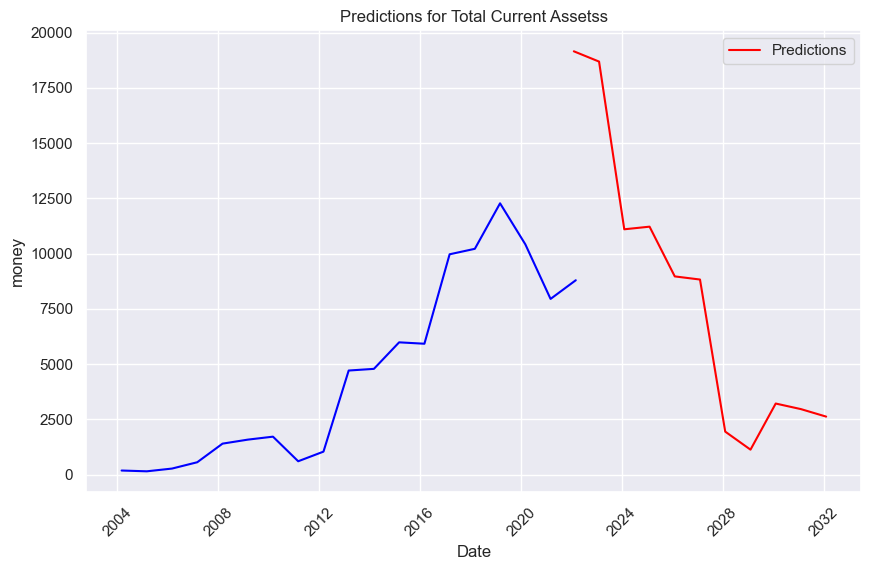

In [23]:
from datetime import datetime
from dateutil.rrule import rrule, YEARLY
from statsmodels.tsa.statespace.sarimax import SARIMAX

y = df_TCA["Total Current Assets"]
SARIMAXmodel = SARIMAX(y, order = (2, 0, 1), seasonal_order=(5,8,10,15))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(11)
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])

predicted_dates = list(rrule(YEARLY, dtstart=datetime(2022, 2, 1), until=datetime(2032,2,1)))
print(predicted_dates)

y_pred_df.index = predicted_dates
y_pred_out = y_pred_df["Predictions"] 

sns.set()
plt.title("Predictions for Total Current Assetss")
plt.ylabel('money')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(df_TCA, color = "blue")
plt.plot(y_pred_out, color='red', label = 'Predictions')
plt.legend()
plt.show()

In [24]:
df_NIUBV = df["Non-Current Investments Unquoted Book Value"]
df_NIUBV = pd.DataFrame(df_NIUBV)
df_NIUBV.columns = ["Non-Current Investments Unquoted Book Value"]

c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1AS-MAR will be used.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1AS-MAR will be used.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All 

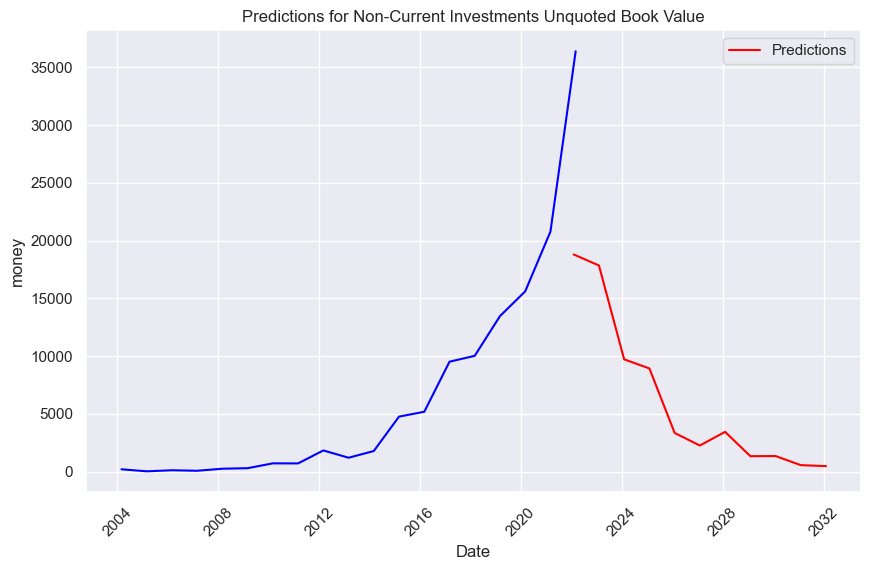

In [25]:
from datetime import datetime
from dateutil.rrule import rrule, YEARLY
from statsmodels.tsa.statespace.sarimax import SARIMAX

y = df_NIUBV["Non-Current Investments Unquoted Book Value"]
SARIMAXmodel = SARIMAX(y, order = (2, 0, 1), seasonal_order=(5,8,10,15))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(11)
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])

predicted_dates = list(rrule(YEARLY, dtstart=datetime(2022, 2, 1), until=datetime(2032,2,1)))

y_pred_df.index = predicted_dates
y_pred_out = y_pred_df["Predictions"] 

sns.set()
plt.title("Predictions for Non-Current Investments Unquoted Book Value")
plt.ylabel('money')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(df_NIUBV, color = "blue")
plt.plot(y_pred_out, color='red', label = 'Predictions')
plt.legend()
plt.show()

using arima 
useless

c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1AS-MAR will be used.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1AS-MAR will be used.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1AS-MAR will be us

[datetime.datetime(2022, 2, 1, 0, 0), datetime.datetime(2023, 2, 1, 0, 0), datetime.datetime(2024, 2, 1, 0, 0), datetime.datetime(2025, 2, 1, 0, 0), datetime.datetime(2026, 2, 1, 0, 0), datetime.datetime(2027, 2, 1, 0, 0), datetime.datetime(2028, 2, 1, 0, 0), datetime.datetime(2029, 2, 1, 0, 0), datetime.datetime(2030, 2, 1, 0, 0), datetime.datetime(2031, 2, 1, 0, 0), datetime.datetime(2032, 2, 1, 0, 0)]


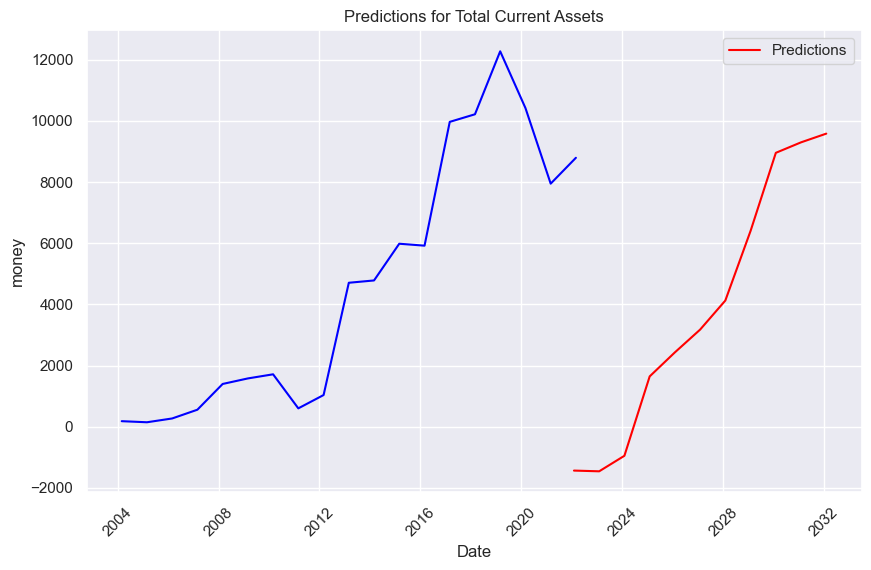

In [26]:
from datetime import datetime
from dateutil.rrule import rrule, YEARLY
from statsmodels.tsa.arima.model import ARIMA

y = df_TCA["Total Current Assets"]
ARIMAModel = ARIMA(y, order=(7, 0, 3))
ARIMAModel = ARIMAModel.fit()

y_pred = ARIMAModel.get_forecast(steps=11)
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df["Predictions"] = y_pred.predicted_mean

predicted_dates = list(rrule(YEARLY, dtstart=datetime(2022, 2, 1), until=datetime(2032, 2, 1)))
print(predicted_dates)

y_pred_df.index = predicted_dates
y_pred_out = y_pred_df["Predictions"]

sns.set()
plt.title("Predictions for Total Current Assets")
plt.ylabel('money')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(df_TCA, color="blue")
plt.plot(y_pred_out, color='red', label='Predictions')
plt.legend()
plt.show()


In [27]:
#code for finding best parameters
# useless
import pandas as pd
from pmdarima.arima import auto_arima

# Define the data
data = pd.Series([
    8793.76, 7947.96, 10418.14, 12275.15, 10216.19, 9967.97, 5919.82, 5983.09, 4782.49,
    4706.91, 1035.89, 600.28, 1713.60, 1578.91, 1397.95, 555.81, 269.68, 145.45, 180.98
])

# Find the optimal order
model = auto_arima(data, trace=True, error_action='ignore', suppress_warnings=True)
order = model.order
print("Optimal Order:", order)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=319.869, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=321.791, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=321.797, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=319.479, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.416 seconds
Optimal Order: (0, 1, 0)


In [28]:
"""#gridsearch for finiding parameters
    #useful
import itertools
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Define the data
data = pd.Series([
    8793.76, 7947.96, 10418.14, 12275.15, 10216.19, 9967.97, 5919.82, 5983.09, 4782.49,
    4706.91, 1035.89, 600.28, 1713.60, 1578.91, 1397.95, 555.81, 269.68, 145.45, 180.98
])

# Define the range of AR, I, and MA parameters
p = range(0, 10)  # AR parameter range
d = range(0, 10)  # I parameter range
q = range(0, 10)  # MA parameter range

# Perform grid search
best_aic = float('inf')
best_order = None

for order in itertools.product(p, d, q):
    try:
        model = ARIMA(data, order=order)
        model_fit = model.fit()
        aic = model_fit.aic
        if aic < best_aic:
            best_aic = aic
            best_order = order
    except:
        continue

print("Optimal Order (AR, I, MA):", best_order)
print("AIC:", best_aic)
"""

'#gridsearch for finiding parameters\n    #useful\nimport itertools\nimport pandas as pd\nfrom statsmodels.tsa.arima.model import ARIMA\n\n# Define the data\ndata = pd.Series([\n    8793.76, 7947.96, 10418.14, 12275.15, 10216.19, 9967.97, 5919.82, 5983.09, 4782.49,\n    4706.91, 1035.89, 600.28, 1713.60, 1578.91, 1397.95, 555.81, 269.68, 145.45, 180.98\n])\n\n# Define the range of AR, I, and MA parameters\np = range(0, 10)  # AR parameter range\nd = range(0, 10)  # I parameter range\nq = range(0, 10)  # MA parameter range\n\n# Perform grid search\nbest_aic = float(\'inf\')\nbest_order = None\n\nfor order in itertools.product(p, d, q):\n    try:\n        model = ARIMA(data, order=order)\n        model_fit = model.fit()\n        aic = model_fit.aic\n        if aic < best_aic:\n            best_aic = aic\n            best_order = order\n    except:\n        continue\n\nprint("Optimal Order (AR, I, MA):", best_order)\nprint("AIC:", best_aic)\n'

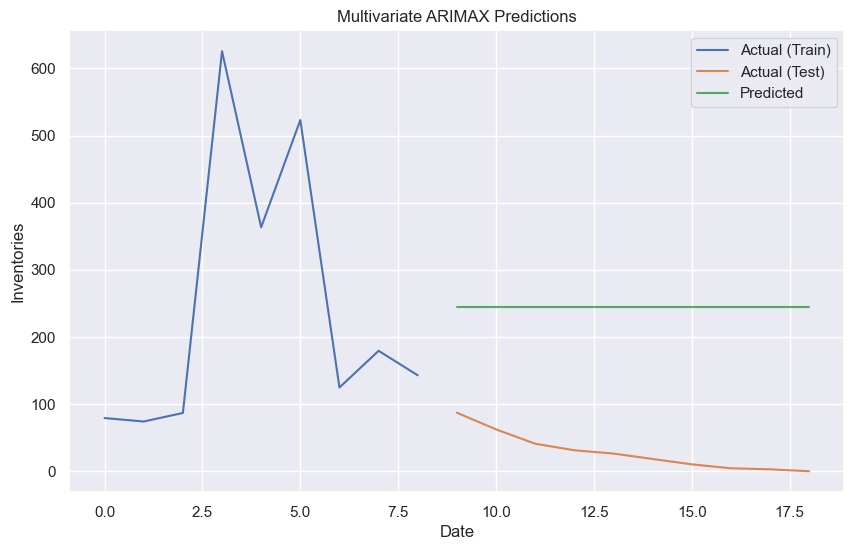

In [29]:
import pandas as pd
import pmdarima as pm
import matplotlib.pyplot as plt

# Create a DataFrame from the provided data
data = {
    'Inventories': [79.33, 74.22, 86.92, 625.45, 363.41, 523, 124.82, 179.46, 143.03, 87.29, 62.52, 41.16, 31.39, 26.49, 18.47, 10.44, 4.61, 3.05, 0.16],
    'Trade Receivables': [1082.13, 1632.42, 2132.67, 1910.06, 3286.28, 1792.09, 1181.26, 748.98, 829.42, 729.43, 242.73, 265.13, 157.99, 211.64, 296.34, 345.64, 78.38, 42.68, 2.47],
    'Cash And Cash Equivalents': [6211.5, 3464.14, 4444.17, 3869.48, 1273.09, 1552.01, 937.62, 495.83, 399.83, 593.59, 535.99, 115.03, 858.68, 1130.71, 889.56, 56.9, 95.65, 30.58, 4.16],
    'Short Term Loans And Advances': [348.26, 704.71, 1571, 3056.98, 2658.99, 3469.38, 2099.34, 3690.65, 2840.6, 1645.35, 156.89, 149.8, 648.39, 123.06, 113.33, 61.51, 54.98, 69.13, 174.19]
}

df = pd.DataFrame(data)

# Split the data into train and test sets
train_data = df.iloc[:-10]  # Use all rows except the last 10 for training
test_data = df.iloc[-10:]  # Use the last 10 rows for testing

# Fit the multivariate ARIMAX model
model = pm.auto_arima(
    train_data['Inventories'],
    exogenous=train_data.drop(columns='Inventories'),
    seasonal=True,
    m=1
)

# Make predictions for the test set
predictions = model.predict(n_periods=len(test_data), exogenous=test_data.drop(columns='Inventories'))

# Plot the actual and predicted values
plt.plot(df.index[:-10], train_data['Inventories'], label='Actual (Train)')
plt.plot(df.index[-10:], test_data['Inventories'], label='Actual (Test)')
plt.plot(df.index[-10:], predictions, label='Predicted')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Inventories')
plt.title('Multivariate ARIMAX Predictions')

# Show legend
plt.legend()

# Display the plot
plt.show()
